In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import pickle

In [163]:
DATASET_PATH = "Covid India Dataset/"
IMAGES_PATH = "Saved Plots/"
MODEL_PATH = "Model Files/"

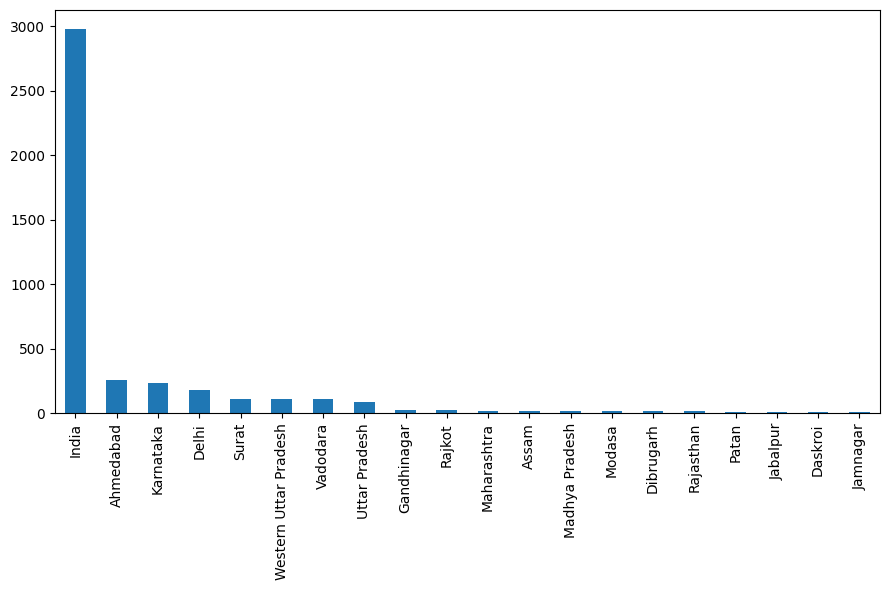

In [195]:
merged = pd.read_csv(DATASET_PATH + "merged.csv")
merged["Location"] = merged["Location"].apply(lambda x: x.split("/")[-1].strip())
x = merged["Sequence"]
y = merged["Location"]
plt.figure(figsize=(9, 6))
y.value_counts().head(20).plot(kind="bar")
plt.tight_layout()
plt.savefig(IMAGES_PATH + "Location Distribution with India.png")
plt.show()

In [196]:
# remove locations with india as location
merged = merged[merged["Location"] != "India"]
x = merged["Sequence"]
y = merged["Location"]

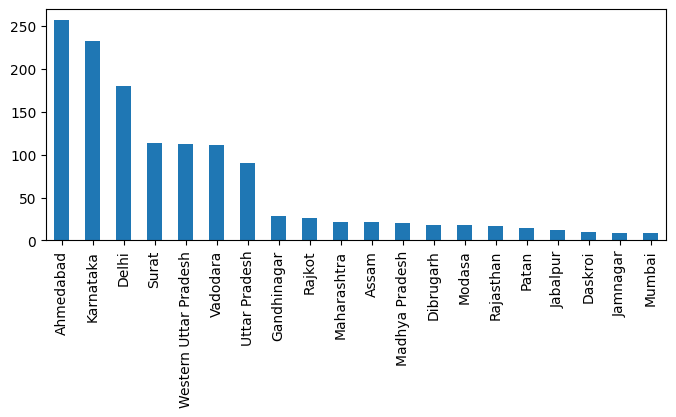

In [197]:
# plot a bar graph of the top 20 locations
plt.figure(figsize=(8, 3))
y.value_counts().head(20).plot(kind="bar")
plt.show()

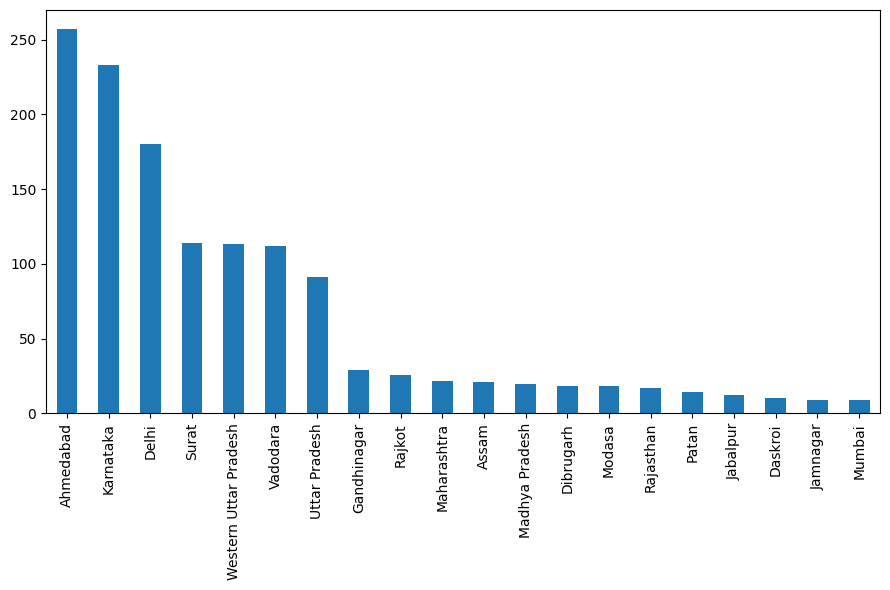

In [198]:
# remove india substring from location
#merged["Location"] = merged["Location"].apply(lambda x: x.replace("India /", "").strip())
merged["Location"] = merged["Location"].apply(lambda x: x.split("/")[-1].strip())
x = merged["Sequence"]
y = merged["Location"]
plt.figure(figsize=(9, 6))
y.value_counts().head(20).plot(kind="bar")
plt.tight_layout()
plt.savefig(IMAGES_PATH + "Location Distribution without India.png")
plt.show()

In [168]:
# remove locations with less than 4 cases
counts = y.value_counts()
counts = counts[counts >= 5]
merged = merged[merged["Location"].isin(counts.index)]
x = merged["Sequence"]
y = merged["Location"]

In [169]:
# balance the dataset
ros = RandomOverSampler(random_state=24)
x, y = ros.fit_resample(np.array(x).reshape(-1, 1), y)

In [170]:
x = pd.DataFrame(x, columns=["Sequence"])
y = pd.DataFrame(y, columns=["Location"])

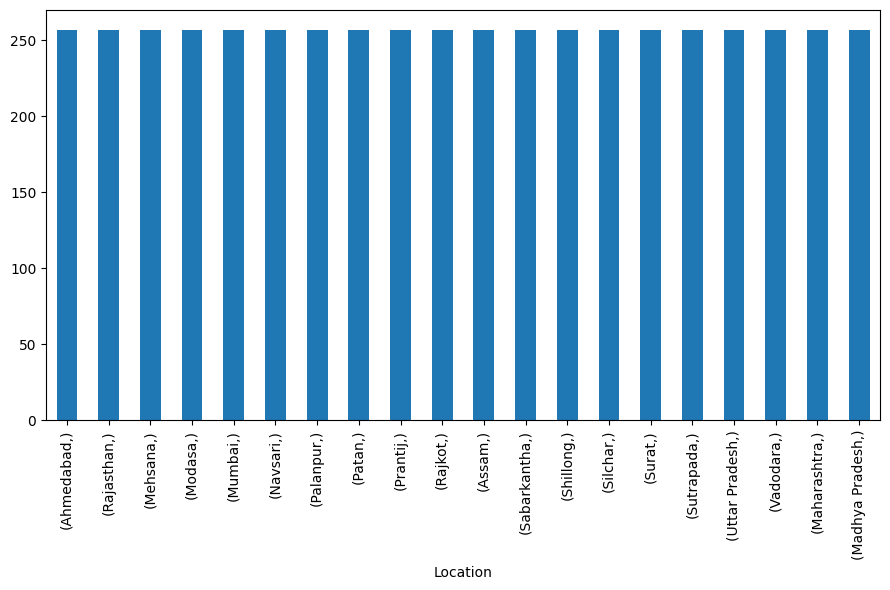

In [171]:
plt.figure(figsize=(9, 6))
y.value_counts().head(20).plot(kind="bar")
plt.tight_layout()
plt.savefig(IMAGES_PATH + "Location Distribution without India oversampled.png")
plt.show()

## Test Train Split

In [172]:
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x, y, test_size=0.2, random_state=42)


## K-Merize

In [173]:
# convert sequence to k mer words of length n
def getKmers(sequence, size=3):
    seq = [sequence[x:x + size].lower() for x in range(len(sequence) - size + 1)]
    n_str = "n"*size
    seq = [x if n_str not in x else "" for x in seq]
    seq = " ".join(seq)
    return seq

x_train = x_train.apply(lambda x: getKmers(x["Sequence"]), axis=1)
x_test = x_test.apply(lambda x: getKmers(x["Sequence"]), axis=1)

# convert it to an array of strings
x_train = np.array(x_train)
x_test = np.array(x_test)


## Count Vectorizer

In [174]:
# create a count vectorizer
cv = CountVectorizer(ngram_range=(2,2))

# fit and transform x_train
x_train = cv.fit_transform(x_train)
# transform x_test
x_test = cv.transform(x_test)

In [175]:
# save the count vectorizer
pickle.dump(cv, open(MODEL_PATH + "count_vectorizer.pkl", "wb"))

In [176]:

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

## Multinomial Bayes Classifier

In [177]:
# create a multinomial naive bayes classifier
nb_classifier = MultinomialNB()
# fit the classifier to x_train and y_train
nb_classifier.fit(x_train, y_train)
# save the classifier
pickle.dump(nb_classifier, open(MODEL_PATH + "naive_bayes_classifier.pkl", "wb"))

# predict the labels of x_test
y_pred = nb_classifier.predict(x_test)

# calculate the accuracy of the model
sk.metrics.accuracy_score(y_test, y_pred)

0.4216990788126919

In [178]:
# create a logistic regression classifier
lr_classifier = LogisticRegression()
# fit the classifier to x_train and y_train
lr_classifier.fit(x_train, y_train)
# save the model
pickle.dump(lr_classifier, open(MODEL_PATH + "logistic_regression_classifier.pkl", "wb"))
# predict the labels of x_test
y_pred = lr_classifier.predict(x_test)
# calculate the accuracy of the model
sk.metrics.accuracy_score(y_test, y_pred)

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5910951893551689

## Random Forest Classifier

In [179]:
# create a random forest classifier
rf_classifier = RandomForestClassifier()
# fit the classifier to x_train and y_train
rf_classifier.fit(x_train, y_train)
# predict the labels of x_test
y_pred = rf_classifier.predict(x_test)
# save the model to a pickle file
pickle.dump(rf_classifier, open(MODEL_PATH + "random_forest_classifier.pkl", "wb"))
# calculate the accuracy of the model
sk.metrics.accuracy_score(y_test, y_pred)


0.9733879222108496

## Support Vector Classifier

In [180]:
# svc
svc_classifier = SVC()
svc_classifier.fit(x_train, y_train)
y_pred = svc_classifier.predict(x_test)
pickle.dump(svc_classifier, open(MODEL_PATH + "support_vector_classifier.pkl", "wb"))
sk.metrics.accuracy_score(y_test, y_pred)

0.06704196519959059

## Other Classifiers

In [181]:
# test other models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

## KNN Classifier

In [182]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)
y_pred = knn_classifier.predict(x_test)
pickle.dump(knn_classifier, open(MODEL_PATH + "knn_classifier.pkl", "wb"))
sk.metrics.accuracy_score(y_test, y_pred)

0.9355168884339816

## Decision Tree Classifier

In [183]:

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)
y_pred = dt_classifier.predict(x_test)
pickle.dump(dt_classifier, open(MODEL_PATH + "decision_tree_classifier.pkl", "wb"))
sk.metrics.accuracy_score(y_test, y_pred)

0.9616171954964176

## Multilayer Perceptron Classifier

In [184]:
mlp_classifier = MLPClassifier()
mlp_classifier.fit(x_train, y_train)
y_pred = mlp_classifier.predict(x_test)
pickle.dump(mlp_classifier, open(MODEL_PATH + "multi_layer_perceptron_classifier.pkl", "wb"))
sk.metrics.accuracy_score(y_test, y_pred)


c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.10030706243602866

## Gradient Boosting Classifier

In [185]:

gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(x_train, y_train)
y_pred = gb_classifier.predict(x_test)
pickle.dump(gb_classifier, open(MODEL_PATH + "gradient_boosting_classifier.pkl", "wb"))
sk.metrics.accuracy_score(y_test, y_pred)

0.9662231320368475

## AdaBoost Classifier

In [186]:
ab_classifier = AdaBoostClassifier()
ab_classifier.fit(x_train, y_train)
y_pred = ab_classifier.predict(x_test)
pickle.dump(ab_classifier, open(MODEL_PATH + "ada_boost_classifier.pkl", "wb"))
sk.metrics.accuracy_score(y_test, y_pred)

0.06857727737973388

## Model Comparison

### Accuracy Comparison

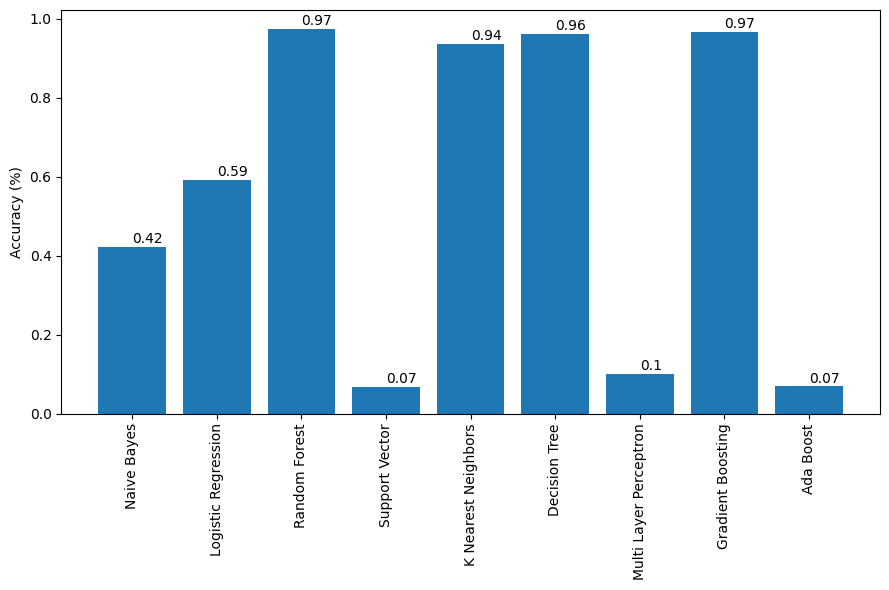

In [187]:

Models = ["Naive Bayes", "Logistic Regression", "Random Forest", "Support Vector", "K Nearest Neighbors", "Decision Tree", "Multi Layer Perceptron", "Gradient Boosting", "Ada Boost"]
y_pred = [nb_classifier.predict(x_test), lr_classifier.predict(x_test), rf_classifier.predict(x_test), svc_classifier.predict(x_test), knn_classifier.predict(x_test), dt_classifier.predict(x_test), mlp_classifier.predict(x_test), gb_classifier.predict(x_test), ab_classifier.predict(x_test)]
accuracies = [sk.metrics.accuracy_score(y_test, y_pred[i]) for i in range(len(y_pred))]

plt.figure(figsize=(9, 6))
plt.bar(Models, accuracies)
plt.xticks(rotation=90)
plt.ylabel("Accuracy (%)")
# show accuracy on top of the bar
for i in range(len(accuracies)):
    plt.text(i, accuracies[i] + 0.01, str(round(accuracies[i], 2)))
plt.tight_layout()
plt.savefig(IMAGES_PATH + "Model Accuracy Comparison.png")
plt.show()

### Prediction Time Comparison

c:\Python310\lib\site-packages\numpy\core\fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


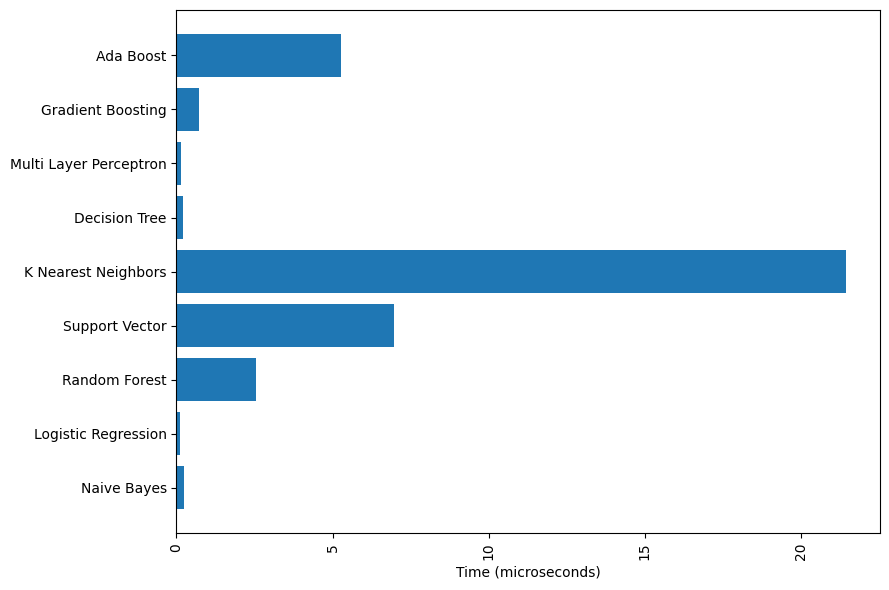

In [188]:
# Prediction time comparison per sample
import time

Model_objects = [nb_classifier, lr_classifier, rf_classifier, svc_classifier, knn_classifier, dt_classifier, mlp_classifier, gb_classifier, ab_classifier]
pred_times = np.zeros(np.shape(Model_objects))

n_times = 200
for i in range(n_times):
    for j in range(len(Model_objects)):
        start = time.time()
        Model_objects[j].predict(x_test[i])
        end = time.time()
        pred_times[j] += end - start

pred_times = np.array(pred_times)
pred_times /= y_test.shape[0]
pred_times /= n_times
pred_times *= 1e6

plt.figure(figsize=(9, 6))
# plot horizontal bar graph
plt.barh(Models, pred_times)
plt.xticks(rotation=90)
plt.xlabel("Time (microseconds)")
# show time on top of the bar
#for i in range(len(pred_times)):
#    plt.text(i, pred_times[i], str(round(pred_times[i], 12)))
plt.tight_layout()
plt.savefig(IMAGES_PATH + "Model Prediction Time Comparison.png")
plt.show()

### Model Size Comparison

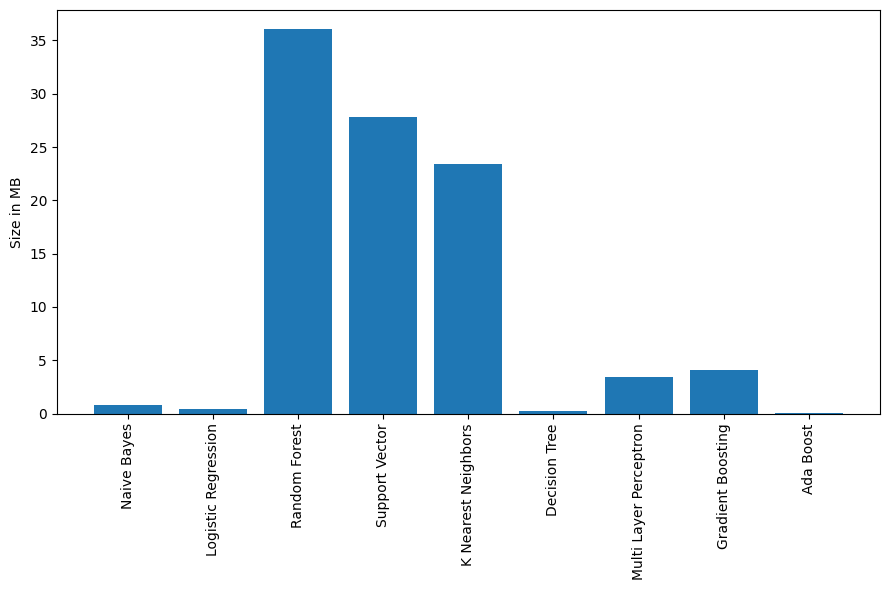

In [189]:
# Model size comparison
import os

Model_file_names = ["naive_bayes_classifier.pkl", "logistic_regression_classifier.pkl", "random_forest_classifier.pkl", "support_vector_classifier.pkl", "knn_classifier.pkl", "decision_tree_classifier.pkl", "multi_layer_perceptron_classifier.pkl", "gradient_boosting_classifier.pkl", "ada_boost_classifier.pkl"]
Model_sizes = [os.path.getsize(MODEL_PATH + Model_file_names[i]) for i in range(len(Model_file_names))]
Model_sizes = np.array(Model_sizes) / (1024*1024)

plt.figure(figsize=(9, 6))
plt.bar(Models, Model_sizes)
plt.xticks(rotation=90)
plt.ylabel("Size in MB")
plt.tight_layout()
plt.savefig(IMAGES_PATH + "Model Size Comparison.png")
plt.show()


## Location Wise Accuracy

In [190]:
y_pred = rf_classifier.predict(x_test)
# for each location, calculate the accuracy
locations = np.unique(y_test)
locations = counts.index

for location in locations:
    loc_test = y_test[y_test == location]
    loc_pred = y_pred[y_test == location]
    print(location, ":", sk.metrics.accuracy_score(loc_test, loc_pred))


Ahmedabad : 0.6666666666666666
Karnataka : 0.9838709677419355
Delhi : 1.0
Surat : 0.9444444444444444
Western Uttar Pradesh : 0.9402985074626866
Vadodara : 0.9215686274509803
Uttar Pradesh : 0.9591836734693877
Gandhinagar : 0.8888888888888888
Rajkot : 0.9272727272727272
Maharashtra : 1.0
Assam : 1.0
Madhya Pradesh : 1.0
Dibrugarh : 0.7111111111111111
Modasa : 0.9591836734693877
Rajasthan : 1.0
Patan : 1.0
Jabalpur : 1.0
Daskroi : 1.0
Jamnagar : 1.0
Mumbai : 1.0
Jaipur : 1.0
Prantij : 1.0
Bharuch : 1.0
Sabarkantha : 1.0
Himatnagar : 1.0
Choryasi : 1.0
Bhavnagar : 1.0
Dahod : 1.0
Palanpur : 1.0
Sutrapada : 1.0
Dahegam : 1.0
Hyderabad : 1.0
Bodeli : 1.0
Silchar : 1.0
Kalol : 1.0
Mehsana : 1.0
Shillong : 1.0
Navsari : 1.0


## Testing on Input Sequence

In [191]:
# load cv and rf models
cv = pickle.load(open(MODEL_PATH + "count_vectorizer.pkl", "rb"))
rf_classifier = pickle.load(open(MODEL_PATH + "random_forest_classifier.pkl", "rb"))

# load the test data
test = open("seq.txt", "r").read()
test = getKmers(test)

# transform the test data
test = cv.transform([test])

# predict the Location
pred = rf_classifier.predict(test)[0]
print(pred)

Ahmedabad


### Take Input from User

In [199]:
import tkinter as tk
from tkinter import filedialog

def browse_file():
    global filename
    filename = filedialog.askopenfilename(initialdir = "/", title = "Select a File", filetypes = (("Text files", "*.txt*"), ("all files", "*.*")))
    print(filename)
    # close the window
    window.destroy()

F:/AI-Model-Training-Deployment-Genome-Sequencing_Girlgenius/Backend/Covid India Dataset/txt files/India_3209.txt
Location:  Delhi


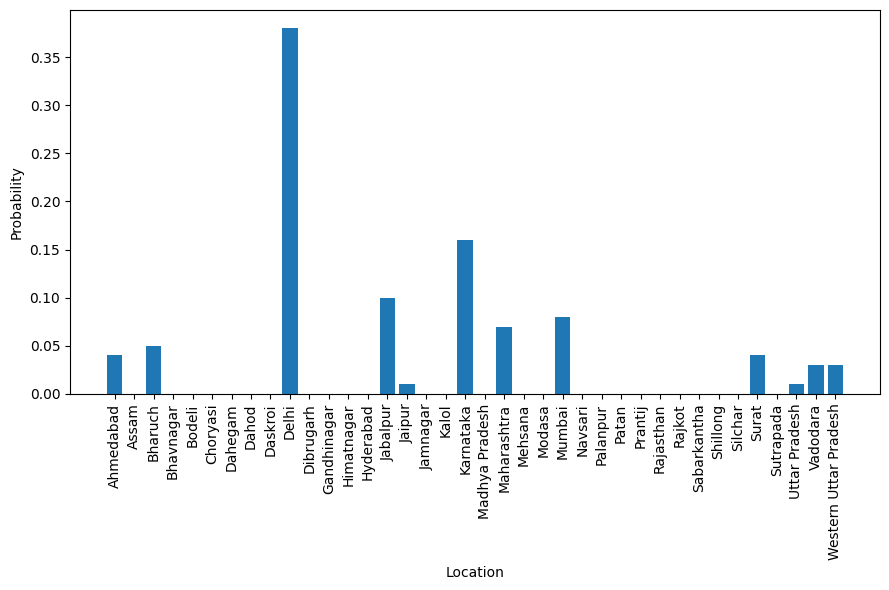

In [201]:
# load cv and rf models
cv = pickle.load(open(MODEL_PATH + "count_vectorizer.pkl", "rb"))
rf_classifier = pickle.load(open(MODEL_PATH + "random_forest_classifier.pkl", "rb"))

# load the test data by taking input txt file from user
window = tk.Tk()
window.title("COVID-19 Location Prediction")
window.geometry("300x100")

browse_button = tk.Button(window, text = "Browse", command = browse_file)
browse_button.pack(padx = 10, pady = 10)

entry = tk.Entry(window)
entry.pack()

#exit_button = tk.Button(window, text = "Exit", command = window.destroy)
#exit_button.pack(padx = 10, pady = 10)

window.mainloop()

test = open(filename, "r").read()
test = getKmers(test)

# transform the test data
test = cv.transform([test])

# predict the Location
pred = rf_classifier.predict(test)[0]
print("Location: ", pred)

# give prediction confidence
pred_prob = rf_classifier.predict_proba(test)[0]
loc_prob = dict(zip(rf_classifier.classes_, pred_prob))

# plot the confidence
plt.figure(figsize=(9, 6))
plt.bar(loc_prob.keys(), loc_prob.values())
plt.xticks(rotation=90)
plt.ylabel("Probability")
plt.xlabel("Location")
plt.tight_layout()
plt.show()

### Read from CSV

In [203]:
# save a random sequence to seq.txt, print the actual locaation

index = 4104
test = pd.read_csv(DATASET_PATH + "merged.csv")

test = test.iloc[index]
print(test["Location"].split("/")[-1].strip())

test = test["Sequence"]

with open("seq.txt", "w") as f:
    f.write(test)

# open the seq.txt file and predict the location
test = open("seq.txt", "r").read()
test = getKmers(test)

test = cv.transform([test])
pred = rf_classifier.predict(test)[0]

print(pred)

Delhi
Delhi


### Convert CSV to txt

In [ ]:
TXT_PATH = "Covid India Dataset/txt files/"

csv = pd.read_csv(DATASET_PATH + "merged.csv")
# split location using / and keep the last part
csv["Location"] = csv["Location"].apply(lambda x: x.split("/")[-1].strip())

# save the sequences to txt files
for i in range(len(csv)):
    txt_name = csv.iloc[i]["Location"] + "_" + str(i) + ".txt"
    with open(TXT_PATH + txt_name, "w") as f:
        f.write(csv.iloc[i]["Sequence"])